# Banknifty Analysis and Trading Ideas

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install pyfolio
%matplotlib inline
import datetime as dt
import pyfolio as pf

In [34]:
import pandas_datareader as pdr

data = pdr.get_data_yahoo('^NSEBANK', '2001-1-1', '2021-8-25')

data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-18,36248.898438,35432.000000,36222.500000,35554.500000,140500.0,35554.500000
2021-08-20,35306.500000,34926.500000,35146.500000,35033.851562,181200.0,35033.851562
2021-08-23,35427.398438,34817.500000,35424.199219,35124.398438,174200.0,35124.398438
2021-08-24,35795.300781,35070.000000,35200.750000,35712.101562,173600.0,35712.101562
2021-08-25,35910.300781,35499.648438,35768.851562,35591.000000,0.0,35591.000000


In [36]:
data['pct']=data['Close'].pct_change()

In [37]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,pct
Date,,,,,,,
2021-08-18,36248.898438,35432.000000,36222.500000,35554.500000,140500.0,35554.500000,-0.008725
2021-08-20,35306.500000,34926.500000,35146.500000,35033.851562,181200.0,35033.851562,-0.014644
2021-08-23,35427.398438,34817.500000,35424.199219,35124.398438,174200.0,35124.398438,0.002585
2021-08-24,35795.300781,35070.000000,35200.750000,35712.101562,173600.0,35712.101562,0.016732
2021-08-25,35910.300781,35499.648438,35768.851562,35591.000000,0.0,35591.000000,-0.003391


In [38]:
data['Adj Close']

Date
2007-09-17     6897.100098
2007-09-18     7059.649902
2007-09-19     7401.850098
2007-09-20     7390.149902
2007-09-21     7464.500000
                  ...     
2021-08-18    35554.500000
2021-08-20    35033.851562
2021-08-23    35124.398438
2021-08-24    35712.101562
2021-08-25    35591.000000
Name: Adj Close, Length: 3136, dtype: float64

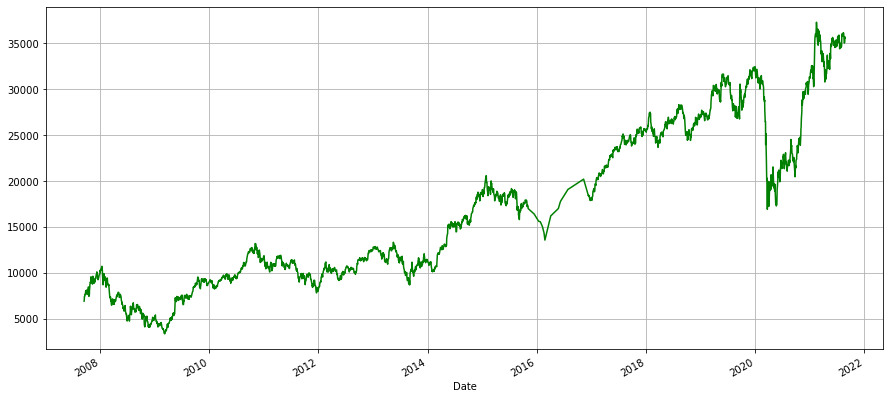

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

data['Adj Close'].plot(figsize=(15, 7), grid=True, color='g')
plt.show()

# Startegy : Gap-down openning between -1% and -2% then buy

In [40]:
data['overnight_returns'] = (
    data['Open']-data['Close'].shift(1))/data['Close'].shift(1)

data['intraday_returns'] = (data['Close']-data['Open'])/data['Open']

data.tail()

,High,Low,Open,Close,Volume,Adj Close,pct,overnight_returns,intraday_returns
Date,,,,,,,,,
2021-08-18,36248.898438,35432.000000,36222.500000,35554.500000,140500.0,35554.500000,-0.008725,0.009899,-0.018442
2021-08-20,35306.500000,34926.500000,35146.500000,35033.851562,181200.0,35033.851562,-0.014644,-0.011475,-0.003205
2021-08-23,35427.398438,34817.500000,35424.199219,35124.398438,174200.0,35124.398438,0.002585,0.011142,-0.008463
2021-08-24,35795.300781,35070.000000,35200.750000,35712.101562,173600.0,35712.101562,0.016732,0.002174,0.014527
2021-08-25,35910.300781,35499.648438,35768.851562,35591.000000,0.0,35591.000000,-0.003391,0.001589,-0.004972


In [41]:
import numpy as np

In [42]:
cond_1 = data.overnight_returns < -0.01
cond_2 = data.overnight_returns > -0.02

data['signal'] = np.where(cond_1 & cond_2, 1, 0)

data.tail()

,High,Low,Open,Close,Volume,Adj Close,pct,overnight_returns,intraday_returns,signal
Date,,,,,,,,,,
2021-08-18,36248.898438,35432.000000,36222.500000,35554.500000,140500.0,35554.500000,-0.008725,0.009899,-0.018442,0
2021-08-20,35306.500000,34926.500000,35146.500000,35033.851562,181200.0,35033.851562,-0.014644,-0.011475,-0.003205,1
2021-08-23,35427.398438,34817.500000,35424.199219,35124.398438,174200.0,35124.398438,0.002585,0.011142,-0.008463,0
2021-08-24,35795.300781,35070.000000,35200.750000,35712.101562,173600.0,35712.101562,0.016732,0.002174,0.014527,0
2021-08-25,35910.300781,35499.648438,35768.851562,35591.000000,0.0,35591.000000,-0.003391,0.001589,-0.004972,0


In [43]:
data.loc[data.signal==1].head()

,High,Low,Open,Close,Volume,Adj Close,pct,overnight_returns,intraday_returns,signal
Date,,,,,,,,,,
2007-12-12,10086.599609,9891.250000,9951.250000,10056.700195,0.0,10056.700195,-0.003369,-0.013820,0.010597,1
2008-03-07,7474.299805,7064.500000,7474.299805,7268.149902,0.0,7268.149902,-0.042196,-0.015030,-0.027581,1
2008-03-10,7375.200195,6945.500000,7163.500000,7272.500000,0.0,7272.500000,0.000599,-0.014398,0.015216,1
2008-03-11,7481.750000,7124.600098,7186.100098,7356.399902,0.0,7356.399902,0.011537,-0.011880,0.023699,1
2008-03-13,7226.799805,6840.649902,7226.799805,6914.649902,0.0,6914.649902,-0.058148,-0.015630,-0.043193,1


In [44]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close,pct,overnight_returns,intraday_returns,signal
count,3136.000000,3136.000000,3136.000000,3136.000000,3.136000e+03,3136.000000,3135.000000,3135.000000,3136.000000,3136.000000
mean,16899.201082,16583.065946,16754.215801,16742.075221,1.368431e+05,16742.075221,0.000724,0.001259,-0.000536,0.045599
std,8749.924978,8647.279763,8707.360340,8699.899056,4.516144e+06,8699.899056,0.020064,0.010703,0.016845,0.208648
min,3446.750000,3314.550049,3385.399902,3339.699951,0.000000e+00,3339.699951,-0.167340,-0.098747,-0.096369,0.000000
25%,9861.075195,9645.662109,9746.462891,9757.849854,0.000000e+00,9757.849854,-0.008414,-0.001982,-0.008434,0.000000
50%,12820.574707,12591.925293,12745.074707,12724.149902,0.000000e+00,12724.149902,0.000736,0.001233,-0.000490,0.000000
75%,24812.575195,24366.750488,24625.824707,24637.687988,0.000000e+00,24637.687988,0.009762,0.004586,0.007602,0.000000
max,37708.750000,36764.250000,37492.601562,37306.250000,2.429860e+08,37306.250000,0.194376,0.197791,0.107642,1.000000


In [45]:
data.loc[data.signal==1].describe()

,High,Low,Open,Close,Volume,Adj Close,pct,overnight_returns,intraday_returns,signal
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0
mean,13383.527972,13050.110865,13203.391287,13232.178696,31423.776224,13232.178696,-0.013089,-0.013431,0.000350,1.0
std,8794.881620,8664.080938,8694.764271,8749.658198,103677.026913,8749.658198,0.020999,0.002532,0.021293,0.0
min,3541.000000,3338.800049,3385.399902,3455.350098,0.000000,3455.350098,-0.070817,-0.019591,-0.055787,1.0
25%,6812.350098,6526.549805,6760.225098,6578.199951,0.000000,6578.199951,-0.027898,-0.015154,-0.013364,1.0
50%,9723.349609,9480.500000,9630.349609,9581.849609,0.000000,9581.849609,-0.012082,-0.012927,0.001148,1.0
75%,18831.424805,18344.924805,18665.525391,18663.000000,0.000000,18663.000000,-0.001851,-0.011288,0.012979,1.0
max,35347.050781,34926.500000,35146.500000,35079.199219,581700.000000,35079.199219,0.063297,-0.010040,0.081994,1.0


# Compute the strategy returns

In [58]:
strategy_returns = data.signal * data.intraday_returns
strategy_returns

Date
2007-09-17   -0.000000
2007-09-18    0.000000
2007-09-19    0.000000
2007-09-20   -0.000000
2007-09-21    0.000000
                ...   
2021-08-18   -0.000000
2021-08-20   -0.003205
2021-08-23   -0.000000
2021-08-24    0.000000
2021-08-25   -0.000000
Length: 3136, dtype: float64

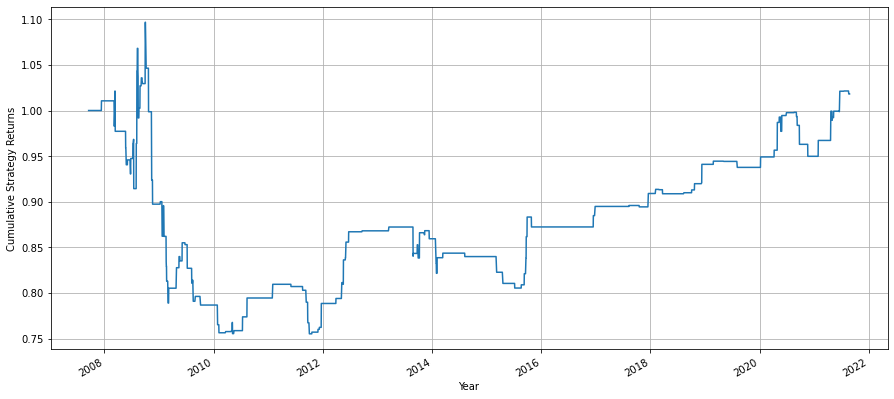

In [47]:
(strategy_returns+1).cumprod().plot(figsize=(15, 7), grid=True)
plt.xlabel('Year')
plt.ylabel('Cumulative Strategy Returns')
plt.show()

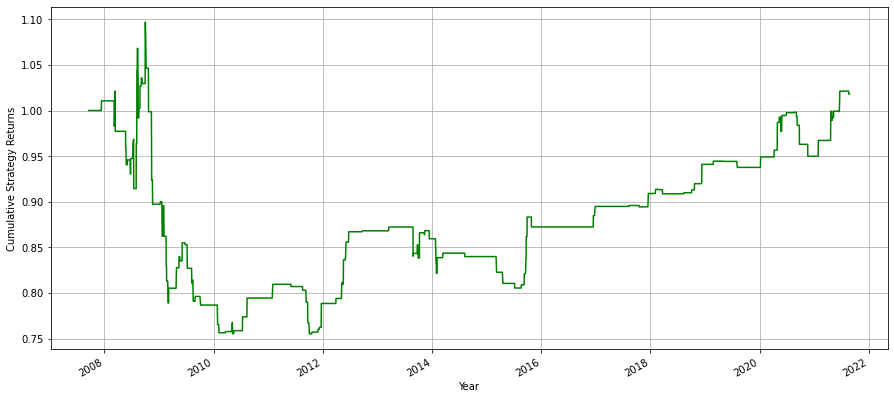

In [49]:
# Plot the cumulative strategy returns
(strategy_returns+1).cumprod().plot(figsize=(15, 7), grid=True, color='g')
plt.xlabel('Year')
plt.ylabel('Cumulative Strategy Returns')
plt.show()

# Detailed Performance Analysis

C:\Users\USER\anaconda3\lib\site-packages\empyrical\stats.py:1527: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Start date,2007-09-17
End date,2021-08-25
Total months,149
,Backtest
Annual return,0.1%
Cumulative returns,1.8%
Annual volatility,7.2%
Sharpe ratio,0.06
Calmar ratio,0.00
Stability,0.18
Max drawdown,-31.1%


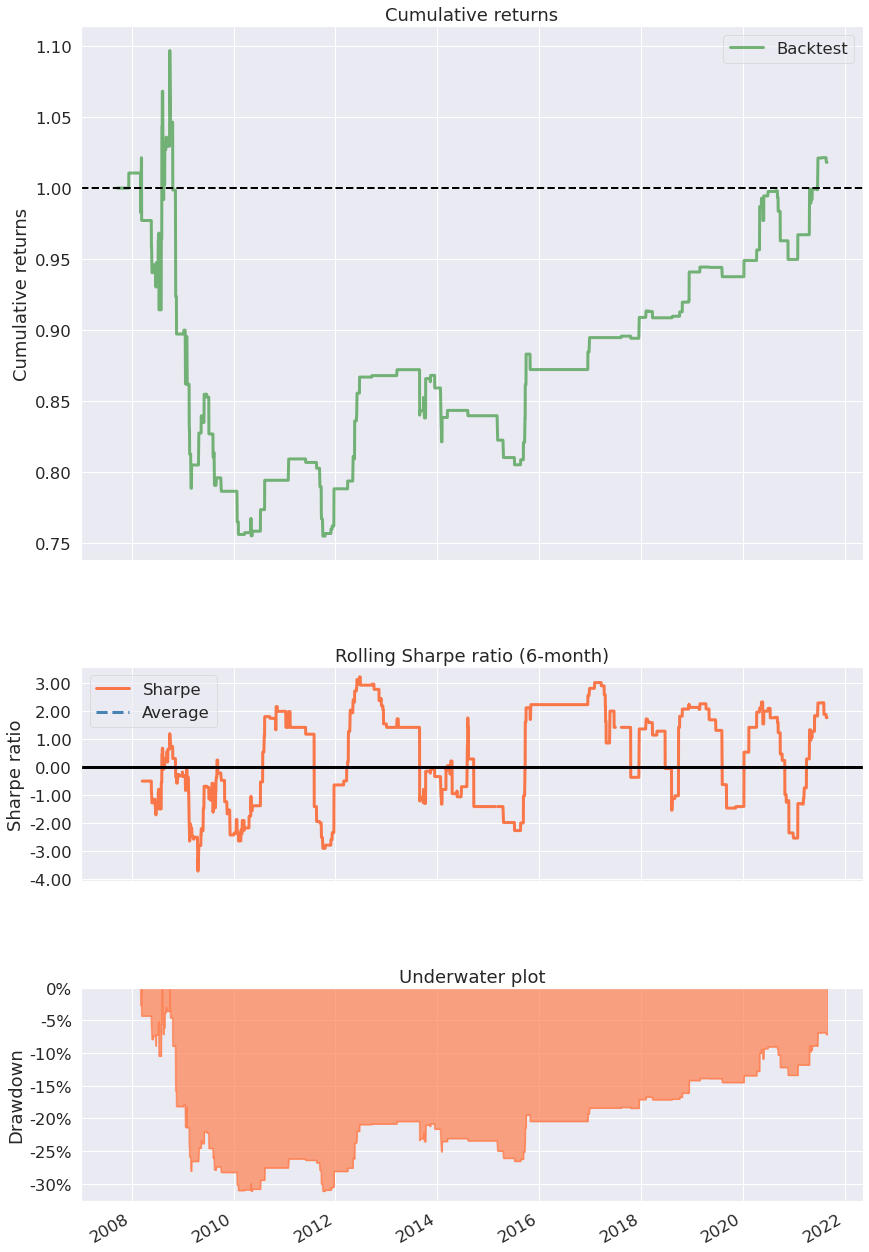

In [51]:
pf.create_simple_tear_sheet(strategy_returns)